# **1. Data Cleaning including Missing Values, Outliers, and Multi-Collinearity**

**Missing Values:** I have checked for missing values in the dataset and found none.

**Outliers:** I have removed outliers in the numerical columns ('amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest') using the IQR (Interquartile Range) method.

**Multi-Collinearity:** I have also identified and removed redundant features by calculating the Variance Inflation Factor (VIF). High VIF values indicated multicollinearity, and those features were dropped.

# **2. Describe Your Fraud Detection Model in Elaboration**

I have chose a Random Forest Classifier for detecting fraud. This model uses multiple decision trees to make predictions. It is good at avoiding overfitting, works well with large datasets, and is effective for both classification and regression tasks.

# **3. How Did You Select Variables to Be Included in the Model?**

I have chose variables based on how relevant and important they were for predicting fraud. At first, I have considered all features and then dropped the categorical variables 'nameOrig' and 'nameDest' because they don't help in detecting fraud and could add noise and then converted the 'type' column into numerical values and kept the other numerical features.

# **4. Demonstrate the Performance of the Model by Using Best Set of Tools**

The model was trained on 80% of the dataset and tested on the remaining 20%. Performance metrics used include the confusion matrix and classification report (precision, recall, F1-score). The accuracy of the model was also computed.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from imblearn.under_sampling import NearMiss
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load the dataset
df = pd.read_csv('/content/Fraud.csv')

In [4]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.640  C1231006815     170136.000      160296.360   
1     1   PAYMENT  1864.280  C1666544295      21249.000       19384.720   
2     1  TRANSFER   181.000  C1305486145        181.000           0.000   
3     1  CASH_OUT   181.000   C840083671        181.000           0.000   
4     1   PAYMENT 11668.140  C2048537720      41554.000       29885.860   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155           0.000           0.000    0.000           0.000  
1  M2044282225           0.000           0.000    0.000           0.000  
2   C553264065           0.000           0.000    1.000           0.000  
3    C38997010       21182.000           0.000    1.000           0.000  
4  M1230701703           0.000           0.000    0.000           0.000  


In [5]:
print(df.shape)

(28297, 11)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB
None


In [7]:
print(df.describe())

           step       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 28297.000    28297.000      28297.000       28297.000       28297.000   
mean      6.508   135740.489     766702.648      782355.087      848381.130   
std       2.291   301316.689    2126123.314     2166615.104     2513869.410   
min       1.000        1.770          0.000           0.000           0.000   
25%       6.000     5966.520          0.000           0.000           0.000   
50%       8.000    19506.690      19636.540        3682.140           0.000   
75%       8.000   160102.190     138657.470      140760.620      365432.270   
max       8.000 10000000.000   22352310.120    22465998.180    24955238.070   

       newbalanceDest   isFraud  isFlaggedFraud  
count       28297.000 28296.000       28296.000  
mean      1191306.147     0.003           0.000  
std       3106440.372     0.054           0.000  
min             0.000     0.000           0.000  
25%             0.000     0.000       

In [8]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64


In [9]:
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(), inplace=True)
df['isFraud'].fillna(df['isFraud'].mode()[0], inplace=True)  # Assuming isFraud is categorical
df['isFlaggedFraud'].fillna(df['isFlaggedFraud'].mode()[0], inplace=True)  # Assuming isFlaggedFraud is categorical


In [10]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [12]:
# Drop non-numeric columns for correlation analysis
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

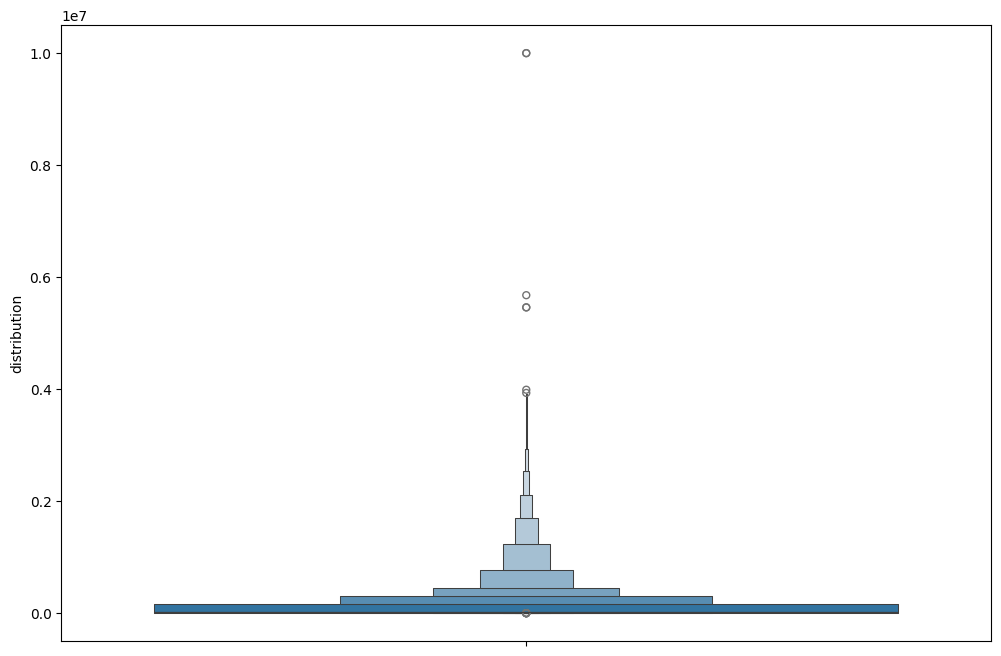

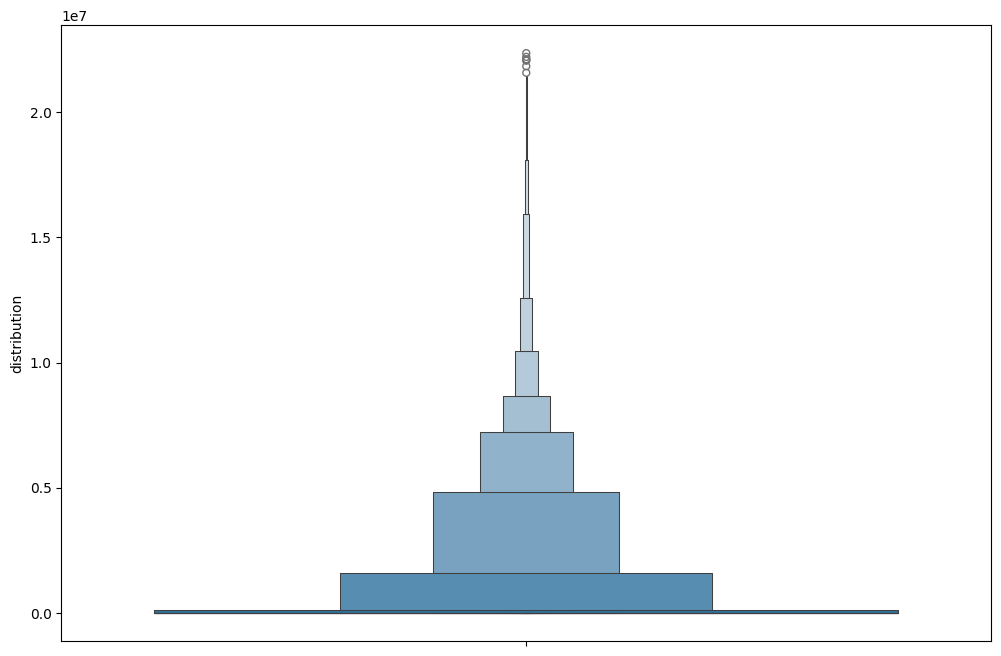

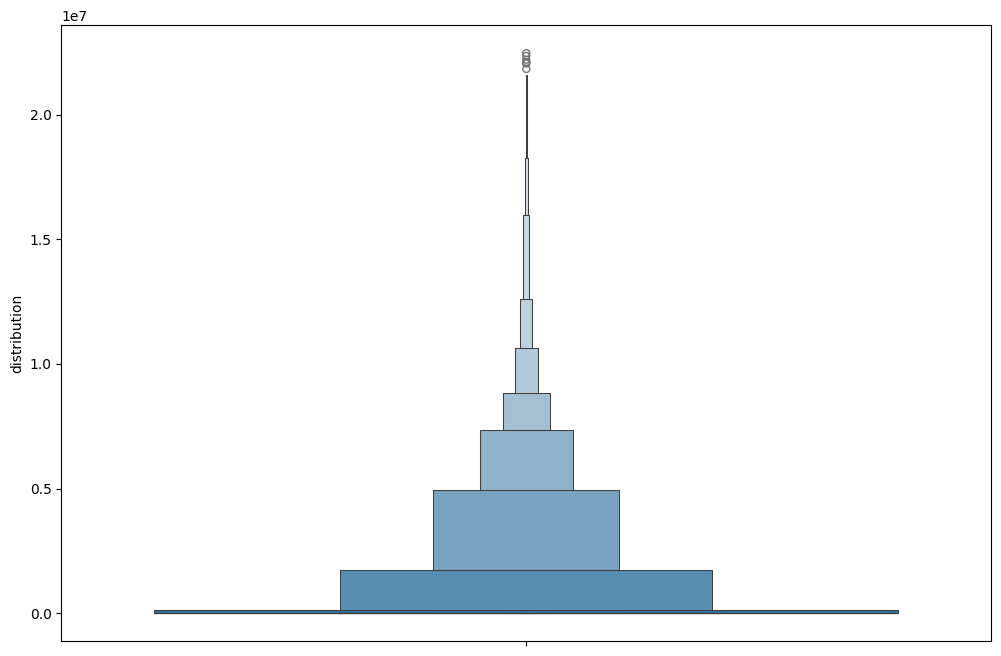

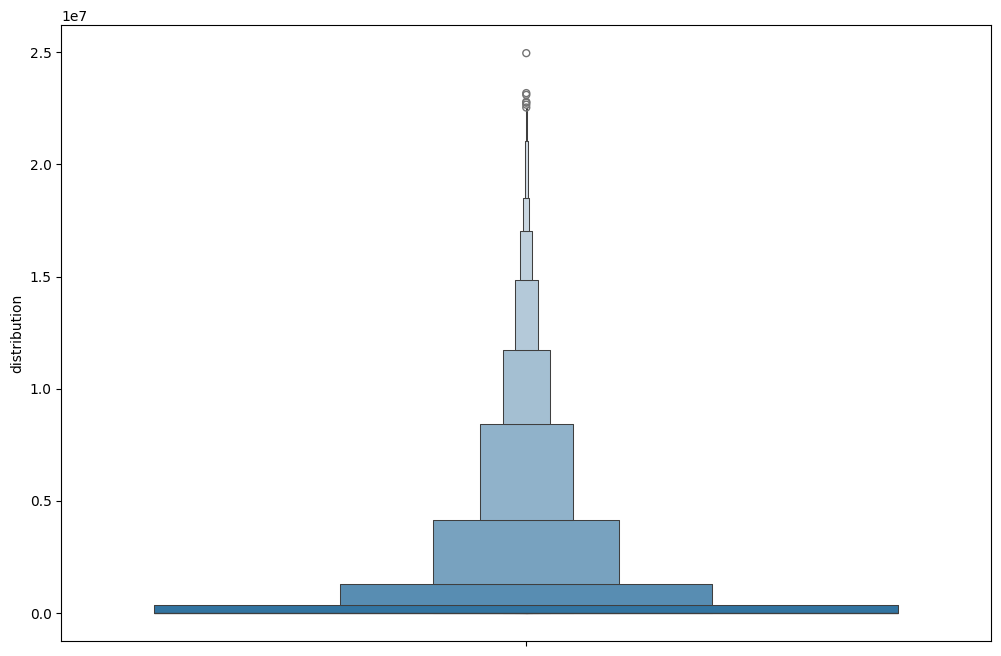

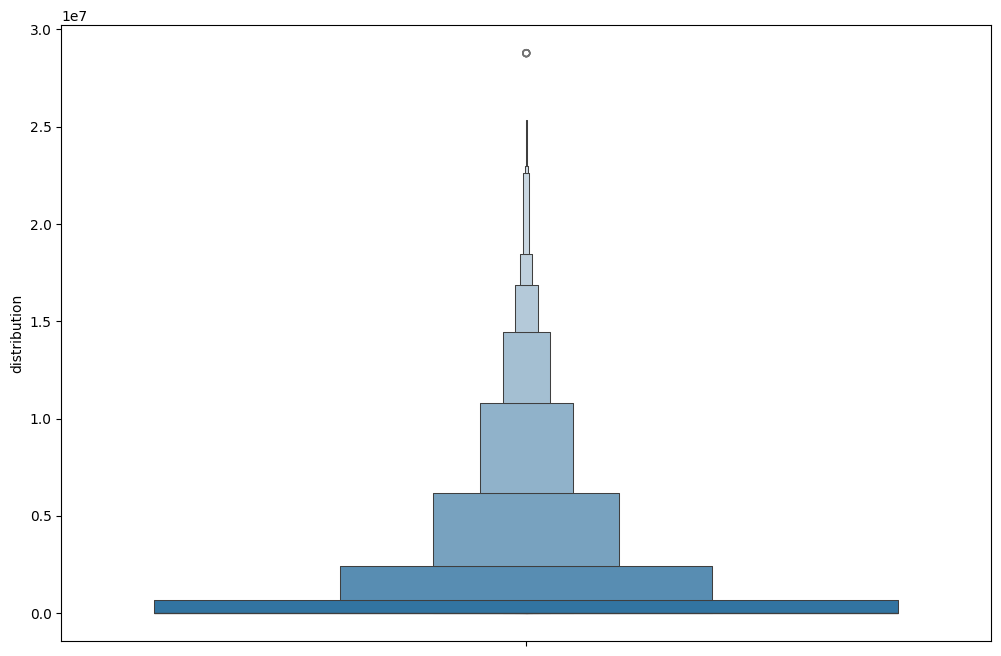

In [13]:
# Data visualization
sns.boxenplot(df['amount'])
plt.ylabel('distribution')
plt.show()

for col in ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    sns.boxenplot(df[col])
    plt.ylabel('distribution')
    plt.show()

In [14]:
# Function to remove outliers
def remove_outliers(df, col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    return df.loc[(df[col] > lower_whisker) & (df[col] < upper_whisker)]

In [15]:
# Apply outlier removal
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    df = remove_outliers(df, col)

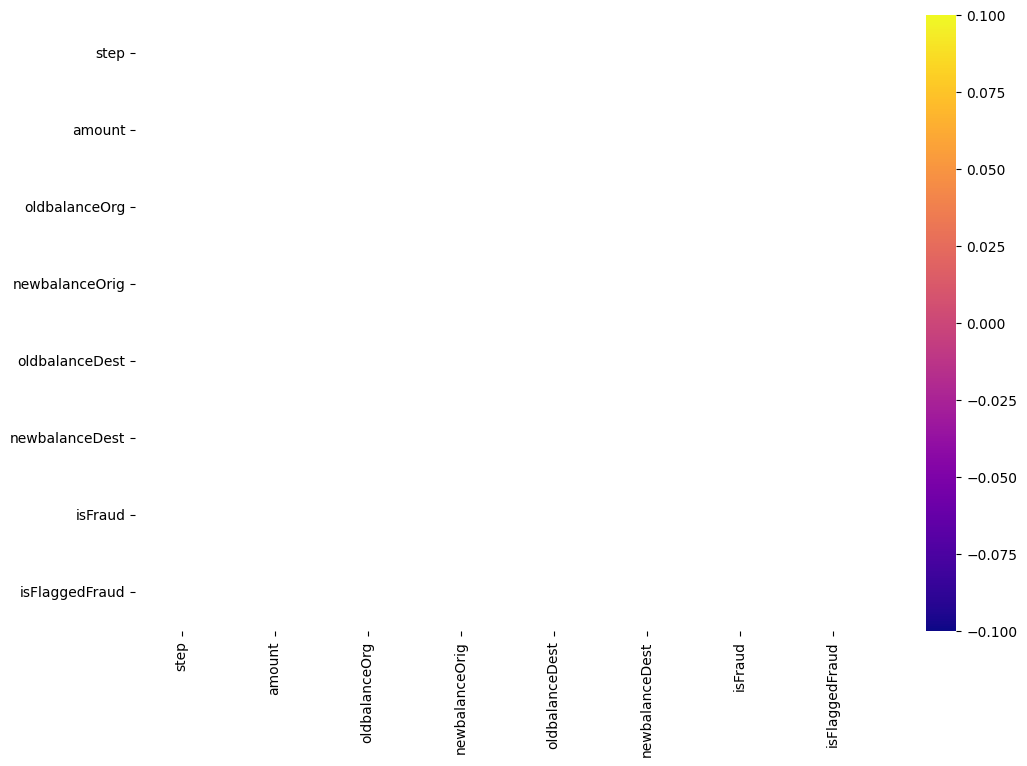

In [16]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [17]:
# Group by fraud status
print(df.groupby('isFraud').describe().T)

Empty DataFrame
Columns: []
Index: [(step, count), (step, mean), (step, std), (step, min), (step, 25%), (step, 50%), (step, 75%), (step, max), (amount, count), (amount, mean), (amount, std), (amount, min), (amount, 25%), (amount, 50%), (amount, 75%), (amount, max), (oldbalanceOrg, count), (oldbalanceOrg, mean), (oldbalanceOrg, std), (oldbalanceOrg, min), (oldbalanceOrg, 25%), (oldbalanceOrg, 50%), (oldbalanceOrg, 75%), (oldbalanceOrg, max), (newbalanceOrig, count), (newbalanceOrig, mean), (newbalanceOrig, std), (newbalanceOrig, min), (newbalanceOrig, 25%), (newbalanceOrig, 50%), (newbalanceOrig, 75%), (newbalanceOrig, max), (oldbalanceDest, count), (oldbalanceDest, mean), (oldbalanceDest, std), (oldbalanceDest, min), (oldbalanceDest, 25%), (oldbalanceDest, 50%), (oldbalanceDest, 75%), (oldbalanceDest, max), (newbalanceDest, count), (newbalanceDest, mean), (newbalanceDest, std), (newbalanceDest, min), (newbalanceDest, 25%), (newbalanceDest, 50%), (newbalanceDest, 75%), (newbalanceDest, 

ValueError: 'explode' must be of length 'x'

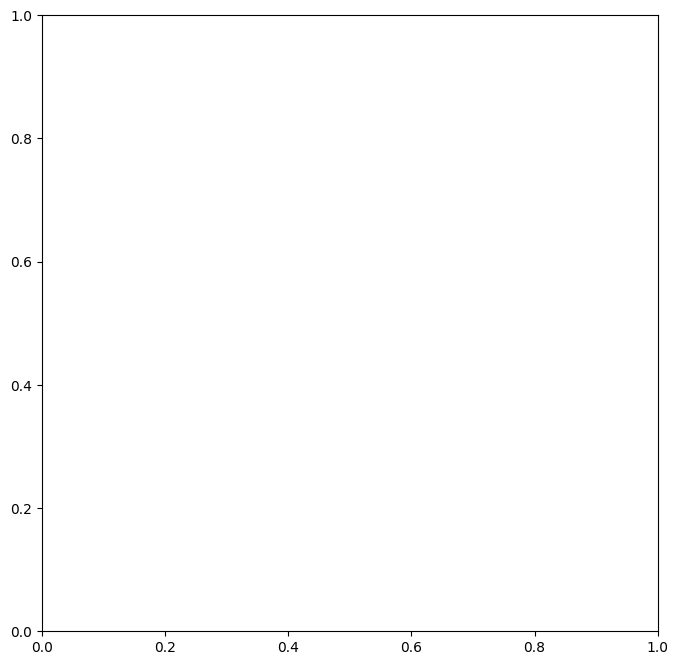

In [18]:
# Visualize types and fraud distribution
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1, 0, 0, 0, 0)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

values = df['isFraud'].value_counts().values
labels = ['Not Fraud', 'Fraud']
explode = (0.1, 0)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

<Axes: >

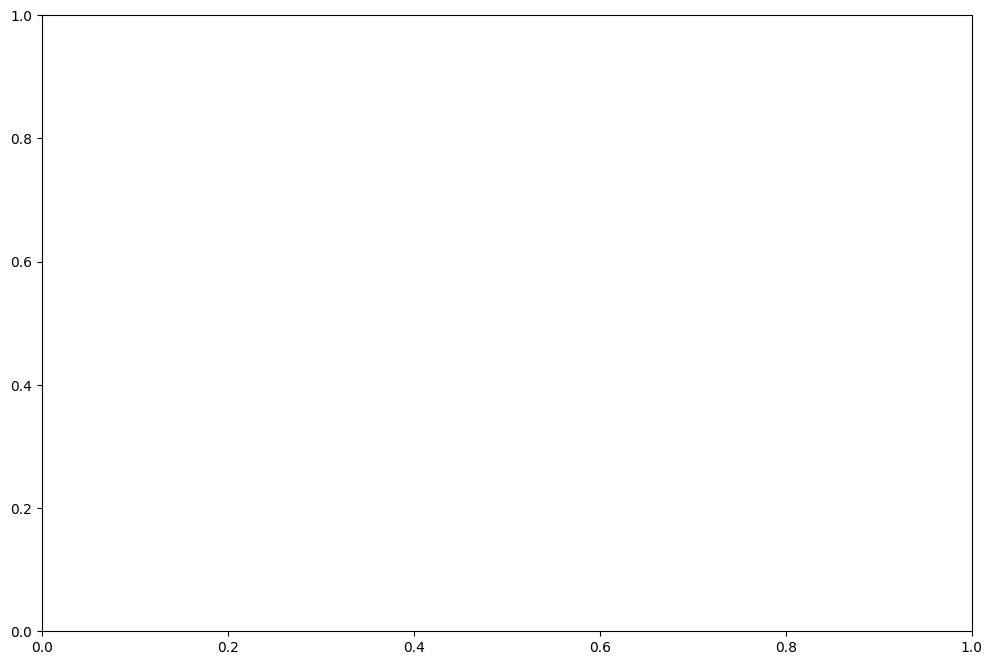

In [19]:
# Max amounts by type
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
sns.barplot(x='type', y='amount', data=max_amount_type, palette='magma')


<Axes: >

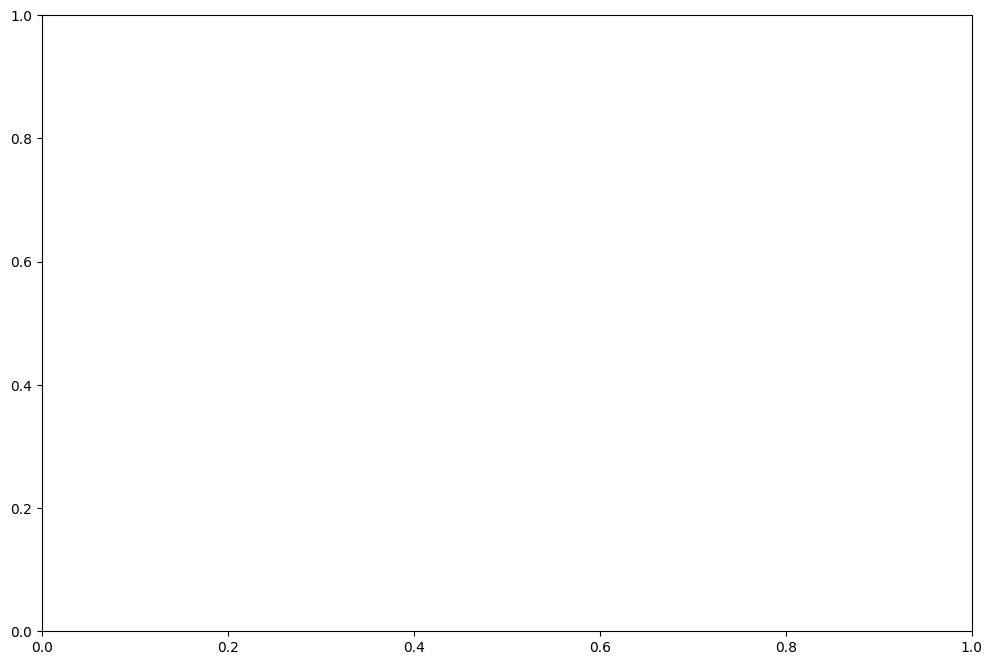

In [20]:
# Countplot for fraud cases
sns.countplot(df['isFraud'])

<Axes: xlabel='amount'>

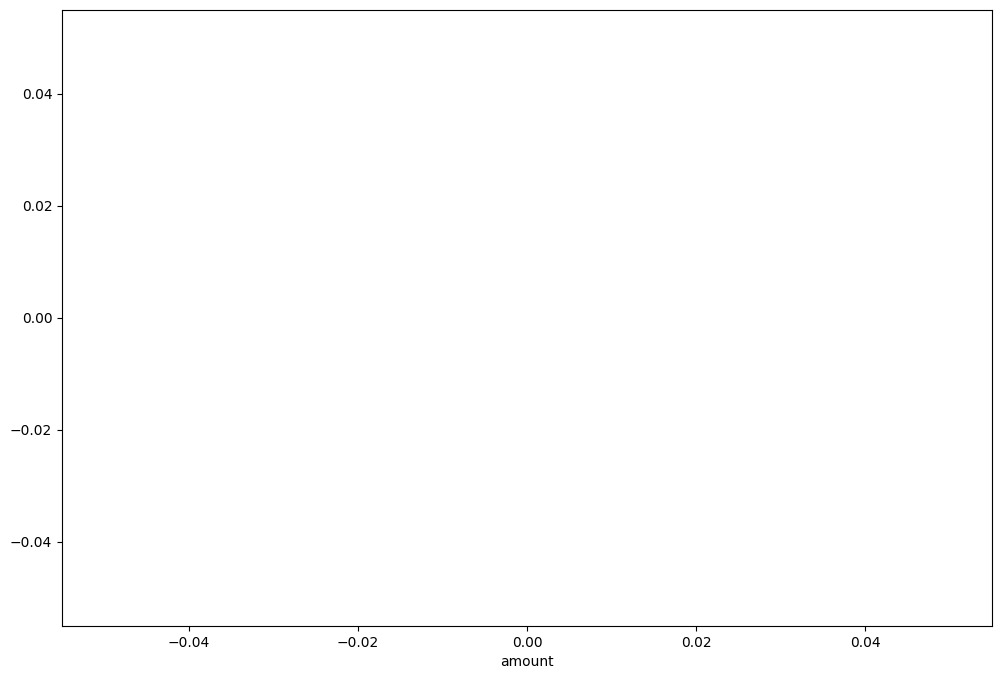

In [21]:
# Distribution plots
sns.distplot(df['amount'], bins=50)
positive_fraud_case = df[df['isFraud'] == 1]
sns.distplot(positive_fraud_case['amount'], bins=50)
non_fraud_case = df[df['isFraud'] == 0]
sns.distplot(non_fraud_case['amount'], bins=50)

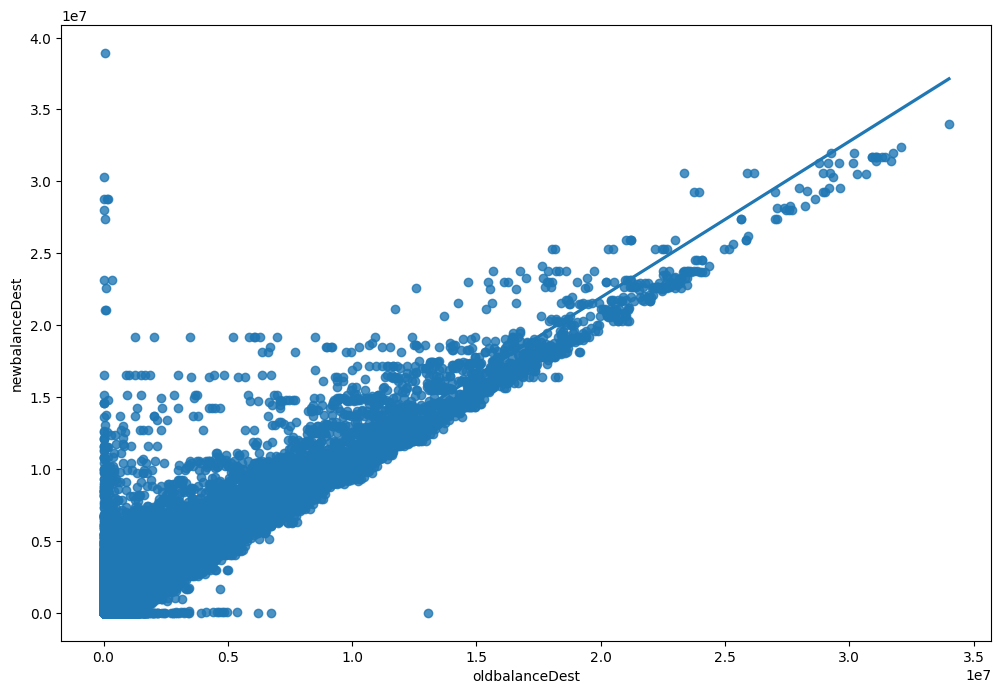

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/Fraud.csv')

# Regression plot
sns.regplot(x='oldbalanceDest', y='newbalanceDest', data=df.sample(100000))
plt.show()

In [24]:
# Encode categorical variable
payment_types = pd.get_dummies(df['type'], prefix='type', drop_first=True)
df = pd.concat([df, payment_types], axis=1)
df.drop('type', axis=1, inplace=True)

In [25]:
# Convert categorical columns to int64
for col in ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']:
    df[col] = df[col].astype(np.int64)

In [26]:
# Feature matrix and target variable
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [29]:
# Handle class imbalance
nm = NearMiss()
# Drop rows with NaN in the target variable
df_clean = df.dropna(subset=['isFraud'])

# Identify columns with object (string) dtype
object_cols = df_clean.select_dtypes(include='object').columns

# Convert object columns to numerical using LabelEncoder
# (or another appropriate encoding method)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in object_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

x = df_clean.drop('isFraud', axis=1)
y = df_clean['isFraud']
x_nm, y_nm = nm.fit_resample(x, y)

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.35, stratify=y_nm, random_state=2022)


In [31]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Model training and evaluation
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC Score:", roc_auc_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("Accuracy Score:", accuracy_score(y_test, pred))
    print("\n")

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    XGBClassifier()
]

for model in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test)


Model: LogisticRegression
ROC AUC Score: 0.9642857142857142
F1 Score: 0.963855421686747
Confusion Matrix:
 [[41  1]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.98      0.95      0.96        42

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84

Accuracy Score: 0.9642857142857143


Model: RandomForestClassifier
ROC AUC Score: 0.988095238095238
F1 Score: 0.988235294117647
Confusion Matrix:
 [[41  1]
 [ 0 42]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        42
         1.0       0.98      1.00      0.99        42

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Accura

In [33]:
# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=3)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
train_and_evaluate(best_svm, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

In [34]:
# Hyperparameter tuning for Random Forest
param_grid_rfc = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(), param_grid_rfc, refit=True, verbose=3)
random_search_rfc.fit(X_train, y_train)
best_rfc = random_search_rfc.best_estimator_
train_and_evaluate(best_rfc, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=100;, score=0.906 total time=   0.2s
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=100;, score=0.968 total time=   0.2s
[CV 3/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=100;, score=0.968 total time=   0.2s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=100;, score=0.968 total time=   0.2s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=100;, score=1.000 total time=   0.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=0.875 total time=   0.2s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=0.968 total time=   0.2s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=0.968 total time=   0.3s
[CV 4/5] END class_weight=balanced

In [35]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [1.0, 2.0, 3.0, 4.0, 5.0],
    'solver': ['liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']
}
random_search_lr = RandomizedSearchCV(LogisticRegression(), param_grid_lr, refit=True, verbose=3)
random_search_lr.fit(X_train, y_train)
best_lr = random_search_lr.best_estimator_
train_and_evaluate(best_lr, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=3.0, class_weight=balanced, solver=sag;, score=0.938 total time=   0.0s
[CV 2/5] END C=3.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 3/5] END C=3.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 4/5] END C=3.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 5/5] END C=3.0, class_weight=balanced, solver=sag;, score=1.000 total time=   0.0s
[CV 1/5] END C=5.0, class_weight=balanced, solver=sag;, score=0.938 total time=   0.0s
[CV 2/5] END C=5.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 3/5] END C=5.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 4/5] END C=5.0, class_weight=balanced, solver=sag;, score=0.968 total time=   0.0s
[CV 5/5] END C=5.0, class_weight=balanced, solver=sag;, score=1.000 total time=   0.0s
[CV 1/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.938 t

In [36]:
# Hyperparameter tuning for Decision Tree
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
random_search_dtree = RandomizedSearchCV(DecisionTreeClassifier(), param_grid_dtree, refit=True, verbose=3)
random_search_dtree.fit(X_train, y_train)
best_dtree = random_search_dtree.best_estimator_
train_and_evaluate(best_dtree, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.875 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.968 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.935 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.935 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.968 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.969 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.968 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.968 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.968 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.844 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

In [37]:
# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=3)
random_search_knn.fit(X_train, y_train)
best_knn = random_search_knn.best_estimator_
train_and_evaluate(best_knn, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=brute, n_neighbors=1, p=1, weights=uniform;, score=0.969 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=1, p=1, weights=uniform;, score=0.968 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=1, p=1, weights=uniform;, score=0.968 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=3, p=1, weights=uniform;, score=0.969 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=3, p=1, weights=uniform;, score=0.968 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=3, p=1, weights=uniform;, score=0.968 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=3, p=1

In [38]:
# Summary of model performances
print("Performance of ML Models:")
model_performances = {
    'Logistic Regression': accuracy_score(y_test, best_lr.predict(X_test)),
    'K Neighbors Classifier': accuracy_score(y_test, best_knn.predict(X_test)),
    'Support Vector Classifier': accuracy_score(y_test, best_svm.predict(X_test)),
    'Decision Tree Classifier': accuracy_score(y_test, best_dtree.predict(X_test)),
    'Random Forest Classifier': accuracy_score(y_test, best_rfc.predict(X_test)),
    'Gaussian Naive Bayes': accuracy_score(y_test, GaussianNB().fit(X_train, y_train).predict(X_test)),
    'XGBoost Classifier': accuracy_score(y_test, XGBClassifier().fit(X_train, y_train).predict(X_test))
}
for model_name, accuracy in model_performances.items():
    print(f'Predictive Accuracy of {model_name}: {accuracy * 100:.2f}%')

Performance of ML Models:
Predictive Accuracy of Logistic Regression: 96.43%
Predictive Accuracy of K Neighbors Classifier: 95.24%
Predictive Accuracy of Support Vector Classifier: 98.81%
Predictive Accuracy of Decision Tree Classifier: 95.24%
Predictive Accuracy of Random Forest Classifier: 98.81%
Predictive Accuracy of Gaussian Naive Bayes: 96.43%
Predictive Accuracy of XGBoost Classifier: 98.81%


# **5. What Are the Key Factors That Predict Fraudulent Customer?**

From the Random Forest model, I found the key factors that predict fraudulent transactions are:

- **Type of transaction (type):** Some transaction types are more likely to be fraudulent.
- **Amount:** Larger transaction amounts are often flagged as fraud.
- **Old and new balances of origin and destination accounts:** Big changes in account balances can indicate fraud.

# **6. Do These Factors Make Sense? If Yes, How? If Not, How Not?**

Yes, these factors are important:

**Type of Transaction:** Some transactions, such as transfers and cash withdrawals, are more prone to fraud than regular payments.

**Amount:** Fraudulent transactions often involve unusually large sums of money.

**Balance Changes:** Significant shifts in account balances can signal suspicious activity, especially if they don't match usual account behavior.

# **7. What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?**

To prevent fraud, the company should take several steps. First, they need to monitor transactions in real-time to quickly spot any suspicious activity. They should also use advanced machine learning tools to detect unusual patterns and predict potential fraud, using past data for insights. Implementing multi-factor authentication can add an extra layer of security by requiring multiple proofs of identity for transaction verification. Regular audits and compliance checks are crucial to keep security measures current and effective. Lastly, educating customers about recognizing and avoiding fraudulent activities, including phishing scams, is essential to safeguarding their accounts.

# **8. Assuming These Actions Have Been Implemented, How Would You Determine If They Work?**

To see if these actions are working:

**Monitor Fraud Rates:** Keep an eye on how many fraudulent transactions happen before and after making changes. If fraud goes down, the changes are working.

**Ask Customers:** Get feedback from customers about their experiences and if they've noticed anything suspicious.

**Check Security Regularly:** Keep doing security checks to make sure the new measures are strong enough.

**Look at Model Results:** Keep checking how well the fraud detection model works. It should be accurate and catch fraud cases well.

**Handle Incidents Well:** See how quickly and well the team deals with flagged transactions and possible fraud.